In [40]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime as dt
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('DataExtract_v2.csv') #read in CSV file provided

C:\Users\geogh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# DROP COLUMNS

In [42]:
df.columns

Index(['MyDealId', 'SfdcDealId', 'OpportunityNumber', 'BookingSystemName',
       'Assets', 'IsPrimary', 'segmentvalue', 'OpportunityTypeValue', 'DealId',
       'SFDCSUPPORTREQUESTID', 'CustomerNumber', 'dealstatusvalue',
       'RegionValue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',
       'Fiscal Year', 'Fiscal Quarter', 'Fiscal Week', 'IntakeDate',
       'AssignedDate', 'FirstDeliverableProvidedDate',
       'FinalDeliverableProvidedDate', 'ContractDecisionDate',
       'EstimatedAwardDate', 'EstimatedDeliveryDate', 'RespondedToSales',
       'SfdcDeliverableDueDate', 'ContractRevenue', 'LineItemRevenue',
       'dealtechnologytags'],
      dtype='object')

In [43]:
df = df[df['RegionValue'] == "AMER"]

In [44]:
df = df.drop(columns=['SfdcDealId','DealId','SFDCSUPPORTREQUESTID','OpportunityNumber','segmentvalue','ContractDecisionDate',
       'EstimatedAwardDate', 'EstimatedDeliveryDate','SfdcDeliverableDueDate'])

In [45]:
df = df[df['dealstatusvalue'] != 'Lost']

In [46]:
df = df[df['dealstatusvalue'] != 'Cancelled']

In [47]:
df = df[df['dealstatusvalue'] != 'No Opportunity']

In [48]:
df = df[df['dealstatusvalue'] != 'Inactive']

In [49]:
df = df[df['dealstatusvalue'] != 'Solutioning']

## Null Management

In [50]:
#correlation between columns
df.corr()

,MyDealId,Assets,IsPrimary,OwnerID,TechnologySolutionOwnerBadge,SMEID,Fiscal Year,Fiscal Week,ContractRevenue,LineItemRevenue
MyDealId,1.000000,0.125970,0.017221,0.078193,0.105112,0.082744,0.879927,0.962156,0.035753,0.026860
Assets,0.125970,1.000000,-0.004810,-0.132155,-0.131199,-0.047573,0.130171,0.134018,0.087424,0.163301
IsPrimary,0.017221,-0.004810,1.000000,0.149906,0.136235,-0.029523,0.043340,0.048587,-0.174115,-0.028459
OwnerID,0.078193,-0.132155,0.149906,1.000000,0.988419,0.871642,0.053177,0.080565,0.012360,-0.001289
TechnologySolutionOwnerBadge,0.105112,-0.131199,0.136235,0.988419,1.000000,0.876441,0.075942,0.105967,0.033538,0.013484
SMEID,0.082744,-0.047573,-0.029523,0.871642,0.876441,1.000000,0.059259,0.072987,0.059286,0.029245
Fiscal Year,0.879927,0.130171,0.043340,0.053177,0.075942,0.059259,1.000000,0.968715,-0.012627,-0.004808
Fiscal Week,0.962156,0.134018,0.048587,0.080565,0.105967,0.072987,0.968715,1.000000,0.009179,0.009261
ContractRevenue,0.035753,0.087424,-0.174115,0.012360,0.033538,0.059286,-0.012627,0.009179,1.000000,0.663556
LineItemRevenue,0.026860,0.163301,-0.028459,-0.001289,0.013484,0.029245,-0.004808,0.009261,0.663556,1.000000


Text(0.5, 1.0, 'Correlations of Missing Values Only')

<Figure size 432x288 with 0 Axes>

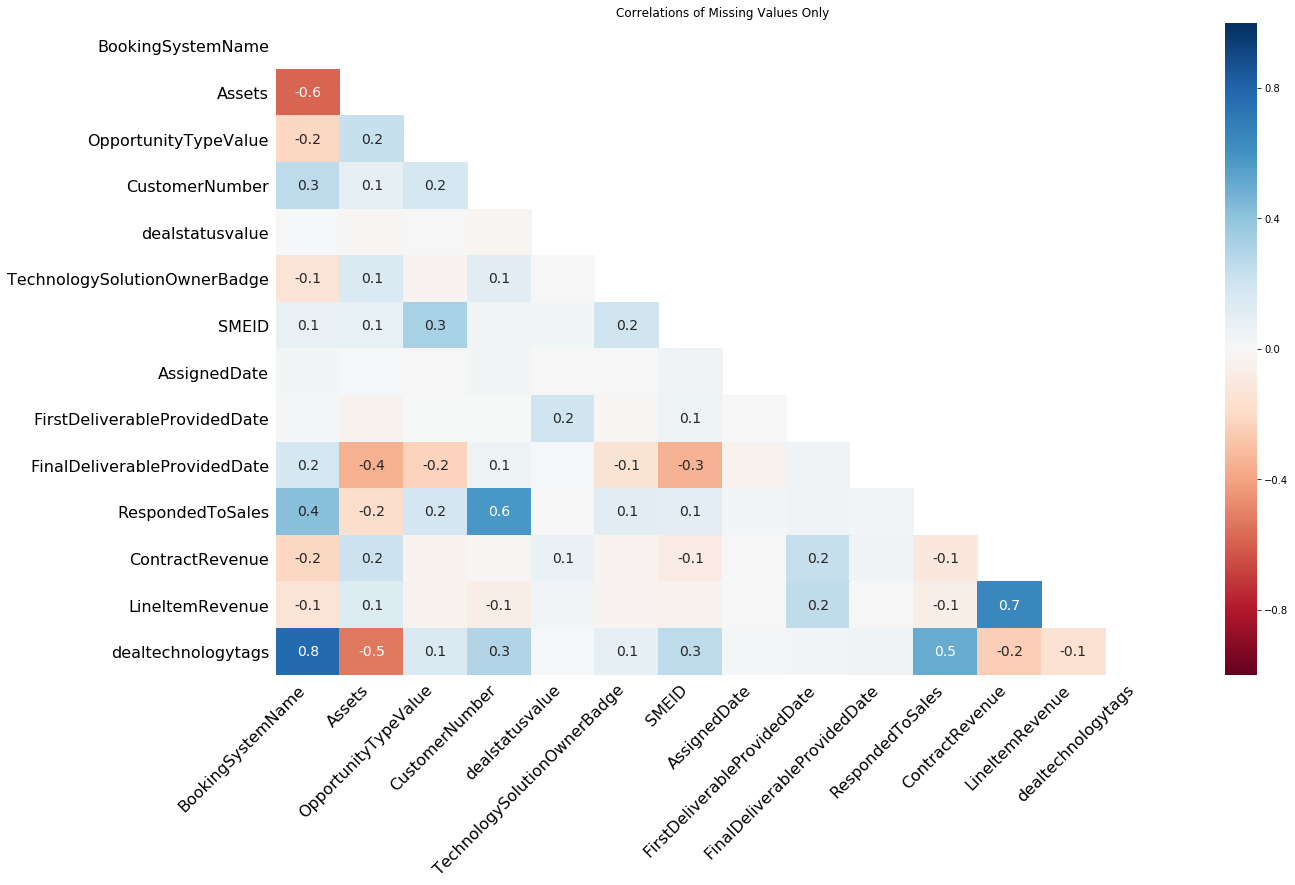

In [51]:
#visualize patterns of missingness
plt.figure()
msno.heatmap(df)
plt.title('Correlations of Missing Values Only')

#### BookingSystemName

In [52]:
df['BookingSystemName'].isna().sum()

4503

In [53]:
#BookingSystemName - Use most common occuring value
mask = df['BookingSystemName'].isna()
most_common = df['BookingSystemName'].value_counts().index[0]
df.loc[mask,'BookingSystemName'] = most_common

#### Assets missing values

In [54]:
df['Assets'].isna().sum()

3486

In [55]:
#Assets - APPROACH TBC, using average as a place holder
mask = df['Assets'].isna()
average_nona = df['Assets'][-mask].mean()
df.loc[mask,'Assets'] = average_nona

#### OpportunityTypeValue

In [56]:
df['OpportunityTypeValue'].isna().sum()

319

In [57]:
#OpportunityTypeValue - use the most common value
mask = df['OpportunityTypeValue'].isna()
most_common = df['OpportunityTypeValue'].value_counts().index[0]
df.loc[mask,'OpportunityTypeValue'] = most_common

#### CustomerNumber

In [58]:
df['CustomerNumber'].isna().sum()

4592

In [59]:
#CustomerNumber - if customer number appears less than 5 times, bucket into unique category, use CustomerNumber otherwise
cust_counts = df['CustomerNumber'].value_counts()
cust_list = cust_counts[cust_counts >= 5].index.tolist()
df['CustomerNumber'] = np.where(df['CustomerNumber'].isin(cust_list),df['CustomerNumber'],0)
df['CustomerNumber'] = df['CustomerNumber'].astype(object)

#### Dealstatusvalue

In [60]:
df['dealstatusvalue'].isna().sum()

2

In [61]:
#Dealstatusvalue - change to Won
mask = df['dealstatusvalue'].isna()
df.loc[mask,'dealstatusvalue'] = "Won"

#### TechnologySolutionOwnerBadge

In [62]:
df['TechnologySolutionOwnerBadge'].isna().sum()

128

In [63]:
#TechnologySolutionOwnerBadge
mask = df['TechnologySolutionOwnerBadge'].isna()
df['TechnologySolutionOwnerBadge'] = np.where(mask, df['OwnerID'], df['TechnologySolutionOwnerBadge'])

#### SMEID

In [64]:
df['SMEID'].isna().sum()

2303

In [65]:
#SMEID - if null or equal to the TechnologySolutionOwnerBadge, code 0, otherwise 1
df['SMEID'] = np.where(df['SMEID'].isnull(),0,df['SMEID'])
df['SMEID'] = np.where(df['SMEID'] == df['OwnerID'],0,1)

#### Assigned Date

In [66]:
df['AssignedDate'].isna().sum()

6

In [67]:
#Assigned Date - Impute from Intake Date
mask = df['AssignedDate'].isna()
df['AssignedDate'] = np.where(mask, df['IntakeDate'], df['AssignedDate'])

#### First Deliverable Provided

In [68]:
df['FirstDeliverableProvidedDate'].isna().sum()

52

In [69]:
#First Deliverable Provided - impute final deliverable provided where available
mask = df['FirstDeliverableProvidedDate'].isna()
df['FirstDeliverableProvidedDate'] = np.where(mask, df['FinalDeliverableProvidedDate'], 
                                              df['FirstDeliverableProvidedDate'])
#drop other rows
df = df.dropna(axis=0, subset=['FirstDeliverableProvidedDate'])

#### Contract Revenue

In [70]:
df['ContractRevenue'].isna().sum()

441

In [71]:
#Impute from Line Item Revenue where available
mask = df['ContractRevenue'].isna()
df['ContractRevenue'] = np.where(mask, df['LineItemRevenue'], df['ContractRevenue'])

#Fill rest with average of column
mask = df['ContractRevenue'].isna()
average_nona = df['ContractRevenue'][-mask].mean()
df.loc[mask,'ContractRevenue'] = average_nona

#### Line Item Revenue

In [72]:
df['LineItemRevenue'].isna().sum()

328

In [73]:
#Impute from Contract Revenue where available
mask = df['LineItemRevenue'].isna()
df['LineItemRevenue'] = np.where(mask, df['ContractRevenue'], df['LineItemRevenue'])

#Fill rest with average of column
mask = df['LineItemRevenue'].isna()
average_nona = df['LineItemRevenue'][-mask].mean()
df.loc[mask,'LineItemRevenue'] = average_nona

#### Drop Columns outside initial analysis

In [74]:
#Drop columns outside initial analysis
df = df.drop(columns=['FinalDeliverableProvidedDate', 'RespondedToSales','dealtechnologytags'])

#### Inspect columns and expor

In [75]:
df.isna().sum()

MyDealId                        0
BookingSystemName               0
Assets                          0
IsPrimary                       0
OpportunityTypeValue            0
CustomerNumber                  0
dealstatusvalue                 0
RegionValue                     0
CountryValue                    0
OwnerID                         0
TechnologySolutionOwnerBadge    0
SMEID                           0
LOBNAME                         0
Technologyname                  0
Fiscal Year                     0
Fiscal Quarter                  0
Fiscal Week                     0
IntakeDate                      0
AssignedDate                    0
FirstDeliverableProvidedDate    0
ContractRevenue                 0
LineItemRevenue                 0
dtype: int64

In [ ]:
pd.read_csv('DataExtract_v3.csv') #export CSV file provided